In [1]:
!gdown https://drive.google.com/uc?id=1Kj47wSBY-9k6Kzfy8r-zlT1H-vUaxgp8
!gdown https://drive.google.com/uc?id=1bQ3qw-5O06STYcpoOruKWEANJt2qYRCa
!gdown https://drive.google.com/uc?id=1tpzP7pm7O55T7Z_0N0_EAS2r1Z_HPs4m

Downloading...
From (original): https://drive.google.com/uc?id=1Kj47wSBY-9k6Kzfy8r-zlT1H-vUaxgp8
From (redirected): https://drive.google.com/uc?id=1Kj47wSBY-9k6Kzfy8r-zlT1H-vUaxgp8&confirm=t&uuid=52043453-8682-422d-a2dd-2d30b67cdc7d
To: /content/fire_yolo.zip
100% 784M/784M [00:03<00:00, 218MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bQ3qw-5O06STYcpoOruKWEANJt2qYRCa
To: /content/test_video.mp4
100% 10.8M/10.8M [00:00<00:00, 99.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tpzP7pm7O55T7Z_0N0_EAS2r1Z_HPs4m
To: /content/fire_data.yaml
100% 197/197 [00:00<00:00, 1.24MB/s]


In [2]:
!unzip /content/fire_yolo.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fire/train/images/WEBFire1151.jpg  
  inflating: fire/train/images/WEBFire1152.jpg  
  inflating: fire/train/images/WEBFire1155.jpg  
  inflating: fire/train/images/WEBFire1157.jpg  
  inflating: fire/train/images/WEBFire1169.jpg  
  inflating: fire/train/images/WEBFire1171.jpg  
  inflating: fire/train/images/WEBFire1178.jpg  
  inflating: fire/train/images/WEBFire1179.jpg  
  inflating: fire/train/images/WEBFire1180.jpg  
  inflating: fire/train/images/WEBFire1183.jpg  
  inflating: fire/train/images/WEBFire1185.jpg  
  inflating: fire/train/images/WEBFire1186.jpg  
  inflating: fire/train/images/WEBFire1187.jpg  
  inflating: fire/train/images/WEBFire1188.jpg  
  inflating: fire/train/images/WEBFire1189.jpg  
  inflating: fire/train/images/WEBFire1190.jpg  
  inflating: fire/train/images/WEBFire1191.jpg  
  inflating: fire/train/images/WEBFire1194.jpg  
  inflating: fire/train/images/WEBFire1195.jpg  
  inflating: fire/train/images/WE

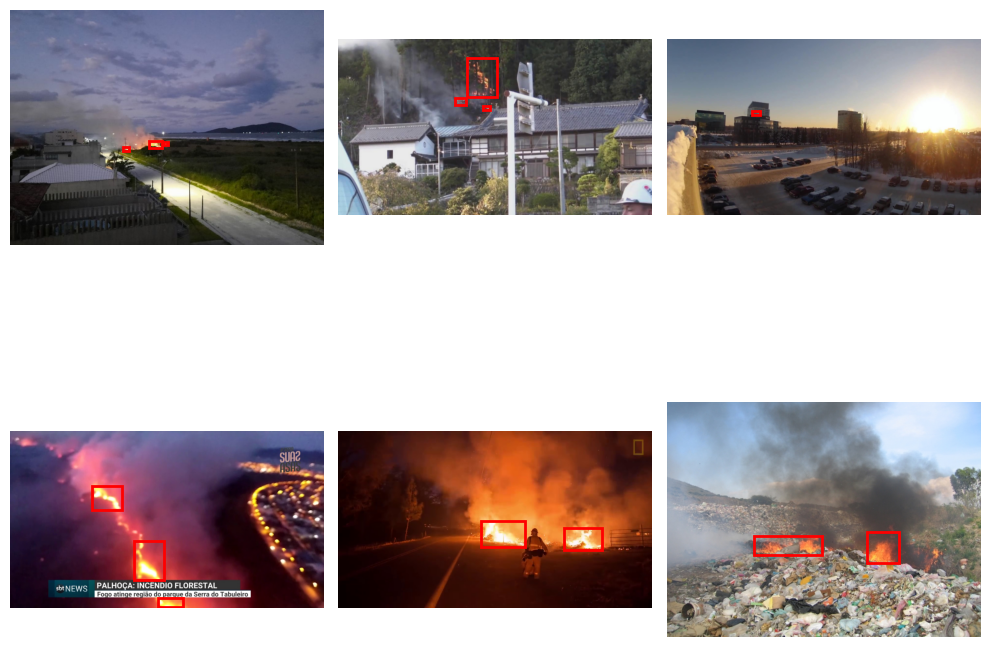

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os
import random

def plot_images_with_boxes(image_paths, label_paths):
    fig, axes = plt.subplots(2, 3, figsize=(10, 10))
    axes = axes.ravel()  # 2x3 그리드를 1차원 배열로 변환

    for idx, (image_path, label_path) in enumerate(zip(image_paths, label_paths)):
        # 이미지 읽기
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 포맷을 사용하므로 RGB로 변환

        # 이미지 크기 얻기
        height, width, _ = image.shape

        # 라벨 읽기
        with open(label_path, 'r') as f:
            labels = f.readlines()

        # 이미지 플롯 설정
        ax = axes[idx]
        ax.imshow(image)
        ax.axis('off')  # 축 숨기기

        for label in labels:
            parts = label.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1]) * width
            y_center = float(parts[2]) * height
            bbox_width = float(parts[3]) * width
            bbox_height = float(parts[4]) * height

            # 좌상단 좌표로 변환
            x_min = x_center - bbox_width / 2
            y_min = y_center - bbox_height / 2

            # 박스 그리기
            rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.tight_layout()
    plt.show()

def get_random_image_label_paths(image_folder, label_folder, num_samples=6):
    all_images = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    sampled_images = random.sample(all_images, num_samples)

    image_paths = [os.path.join(image_folder, img) for img in sampled_images]
    label_paths = [os.path.join(label_folder, os.path.splitext(img)[0] + '.txt') for img in sampled_images]

    return image_paths, label_paths

# 이미지와 라벨 파일이 있는 폴더 경로
image_folder = '/content/fire/train/images'
label_folder = '/content/fire/train/labels'

# 랜덤으로 이미지와 라벨 파일 경로 추출
image_paths, label_paths = get_random_image_label_paths(image_folder, label_folder)

# 함수 호출
plot_images_with_boxes(image_paths, label_paths)

In [4]:
!pip install ultralytics
# yolo 사용가능토록 해주는 라이브러리 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
# pretrained 모델명 기재
# yolov8은 yolov8n.pt, yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt
# 모델을 프리트레인으로 제공 오른쪽으로 갈수록 무거운 모델

model.train(data='/content/fire_data.yaml',project="Yolov8",name="firedetection",epochs=20, imgsz=640, batch=16)
# 기타 파라메터는 https://docs.ultralytics.com/ko/ 여기서 확인
# 파라메터 설정하지 않은 값은 default로 실행됨

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fire_data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Yolov8, name=firedetection8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 41.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/fire/train/labels... 3522 images, 5 backgrounds, 3 corrupt: 100%|██████████| 3527/3527 [00:07<00:00, 454.16it/s]

train: WARNING ⚠️ /content/fire/train/images/new_fire_fire.108.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0026]
train: WARNING ⚠️ /content/fire/train/images/new_fire_fire.420.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0048]
train: WARNING ⚠️ /content/fire/train/images/new_fire_fire.512.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0005]


train: New cache created: /content/fire/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/fire/val/labels... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<00:00, 321.29it/s]

val: New cache created: /content/fire/val/labels.cache


Plotting labels to Yolov8/firedetection8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to Yolov8/firedetection8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.59G      1.953      2.932      1.624         35        640: 100%|█████████▉| 220/221 [02:08<00:00,  1.27it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/10      2.63G      1.953      2.932      1.625          7        640: 100%|██████████| 221/221 [02:10<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]

                   all        150        256      0.315      0.281      0.231      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.3G      2.021      2.272      1.686         22        640: 100%|██████████| 221/221 [02:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]


                   all        150        256      0.267       0.32      0.206     0.0743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.29G      1.993      2.088      1.664         10        640: 100%|██████████| 221/221 [02:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        150        256      0.465      0.364      0.335      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.31G      1.939      1.928      1.613          7        640: 100%|██████████| 221/221 [02:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        150        256      0.394      0.379      0.338      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.29G       1.88      1.872      1.567          6        640: 100%|██████████| 221/221 [02:02<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        150        256      0.394      0.376      0.355       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.3G      1.811      1.775      1.518          6        640: 100%|██████████| 221/221 [02:00<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        150        256      0.513      0.363      0.391      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.29G      1.758      1.691       1.47         10        640: 100%|██████████| 221/221 [02:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        150        256       0.42      0.461      0.398      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.31G      1.715      1.619      1.456          8        640: 100%|██████████| 221/221 [02:00<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        150        256      0.434      0.391      0.382      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.34G       1.67      1.568      1.411         12        640: 100%|██████████| 221/221 [02:00<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        150        256      0.482      0.406      0.394       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.29G       1.63      1.501      1.388          5        640: 100%|██████████| 221/221 [02:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        150        256      0.471      0.445      0.398      0.203



10 epochs completed in 0.353 hours.
Optimizer stripped from Yolov8/firedetection8/weights/last.pt, 6.2MB
Optimizer stripped from Yolov8/firedetection8/weights/best.pt, 6.2MB

Validating Yolov8/firedetection8/weights/best.pt...
Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


                   all        150        256      0.464      0.445      0.396      0.203
Speed: 0.6ms preprocess, 5.4ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to Yolov8/firedetection8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7e47226e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/content/Yolov8/firedetection8/weights/best.pt")

# Open the video file
video_path = "/content/test_video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/annotated_video.mp4', fourcc, fps, (width, height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the annotated frame to the output video
        out.write(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0: 384x640 3 fires, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 fires, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 fires, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 fires, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 fires, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 fires, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 fires, 14.8ms
Speed: 2.1ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 fires, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 2.0ms postprocess per